## Taurine Image Analysis
Used to create data for taurine analysis and for supplementary figures

Authors: Nhan Huynh & Veronika Pister

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import tifffile as tiff
from skimage import io, filters, exposure, morphology, measure, transform
from scipy.stats import chi2_contingency, f_oneway, norm

from image_functions import *
plt.rcParams['figure.figsize'] = (5,5)

%load_ext autoreload
%autoreload 2

In [3]:
"""
Standard Params:
----------------

STRUCTURING_ELEMENT = morphology.disk(2)
MIN_OBJ_SIZE = 20000
MIN_HOLE_SIZE = 50000

"""

'\nStandard Params:\n----------------\n\nSTRUCTURING_ELEMENT = morphology.disk(2)\nMIN_OBJ_SIZE = 20000\nMIN_HOLE_SIZE = 50000\n\n'

# MB404

In [5]:
dataset = '404_new'
map2, taurine, dapi, vsnl1 = load_dataset(f"mb{dataset}")

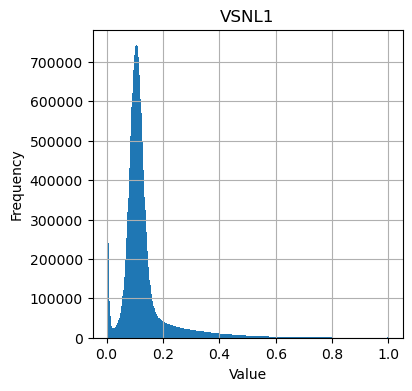

In [6]:
with plt.rc_context({'figure.figsize': (4,4)}):
    plt.hist(vsnl1.flatten(), bins=500)
    plt.title("VSNL1")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.grid(True)
    plt.show()

### Manual gating and analysis

In [7]:
# Manual gating cutoffs
MAP2_CUTOFF_404 = 0.28

VSNL1_CUTOFF_404 = 0.165
vsnl1_struct_size_404 = 8
vsnl1_min_obj_size_404 = 10000
VSNL1_ARTIFACT_CUTOFF_404 = 0.9

DAPI_CUTOFF = 0.02

# Getting masks for MAP2, VSNL1, and Tissue
map2_mask = get_mask(
    map2, MAP2_CUTOFF_404, 
    title="Map2", dataset=dataset
)

vsnl1_mask = get_mask(
    vsnl1, VSNL1_CUTOFF_404, 
    title="Vsnl1", dataset=dataset, 
    structuring_element_size = vsnl1_struct_size_404,
    min_object_size=vsnl1_min_obj_size_404
)

vsnl1_artifact_mask = get_mask(
    vsnl1, VSNL1_ARTIFACT_CUTOFF_404, 
    title="Artifact", dataset=dataset
)

tissue_mask = get_tissue_mask(
    dapi, DAPI_CUTOFF, 
    dataset=dataset, title='tissue',
    min_object_size=5000,
)

/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:38: UserWarning: ./mb404_new/Artifact_obj.tif is a low contrast image
  io.imsave(name, image.astype('uint8') * 255)
/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:38: UserWarning: ./mb404_new/Artifact_hole.tif is a low contrast image
  io.imsave(name, image.astype('uint8') * 255)
/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:38: UserWarning: ./mb404_new/Artifact_closed.tif is a low contrast image
  io.imsave(name, image.astype('uint8') * 255)


### Artifact Removal

In [8]:
vsnl1_mask = np.logical_and(vsnl1_mask, np.logical_not(vsnl1_artifact_mask))

### Calling Regions

BOTH


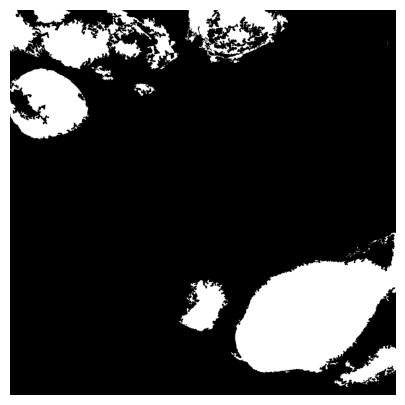

MAP2


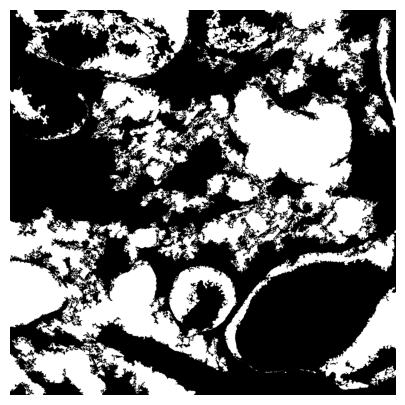

VSNL1


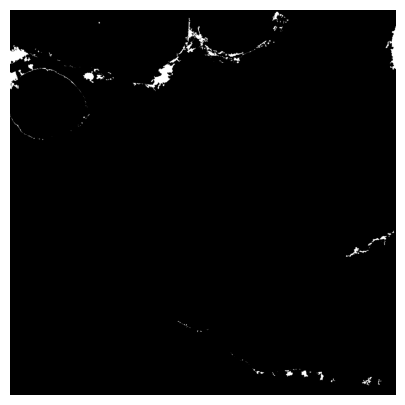

NEITHER


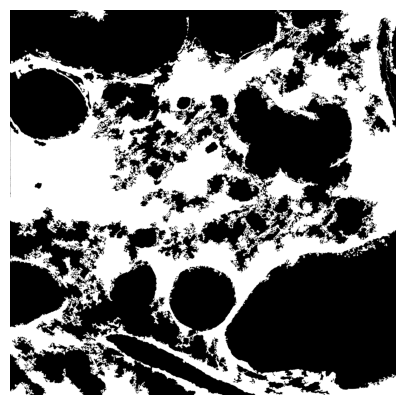

/var/folders/_r/g7gmm8v57w3b2bltn9287fwc0000gn/T/ipykernel_95455/1893775222.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = dfs_404[0].append(dfs_404[1]).append(dfs_404[2]).append(dfs_404[3])
/var/folders/_r/g7gmm8v57w3b2bltn9287fwc0000gn/T/ipykernel_95455/1893775222.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = dfs_404[0].append(dfs_404[1]).append(dfs_404[2]).append(dfs_404[3])


In [9]:
# Get regions with are positive for both markers, one marker, or neither marker
dfs_404 = get_taurine_by_region(tissue_mask, vsnl1_mask, map2_mask, taurine)
concat_df = dfs_404[0].append(dfs_404[1]).append(dfs_404[2]).append(dfs_404[3])

### Analyzing region differences

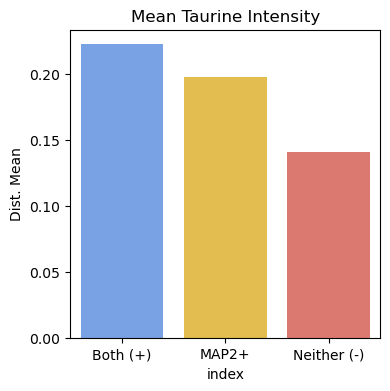

In [11]:
with plt.rc_context({'figure.figsize': (4,4)}):
    get_taurine_bar_plot(dfs_404, dataset)

/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:243: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = both_df.append(map2_df).append(neither_df)


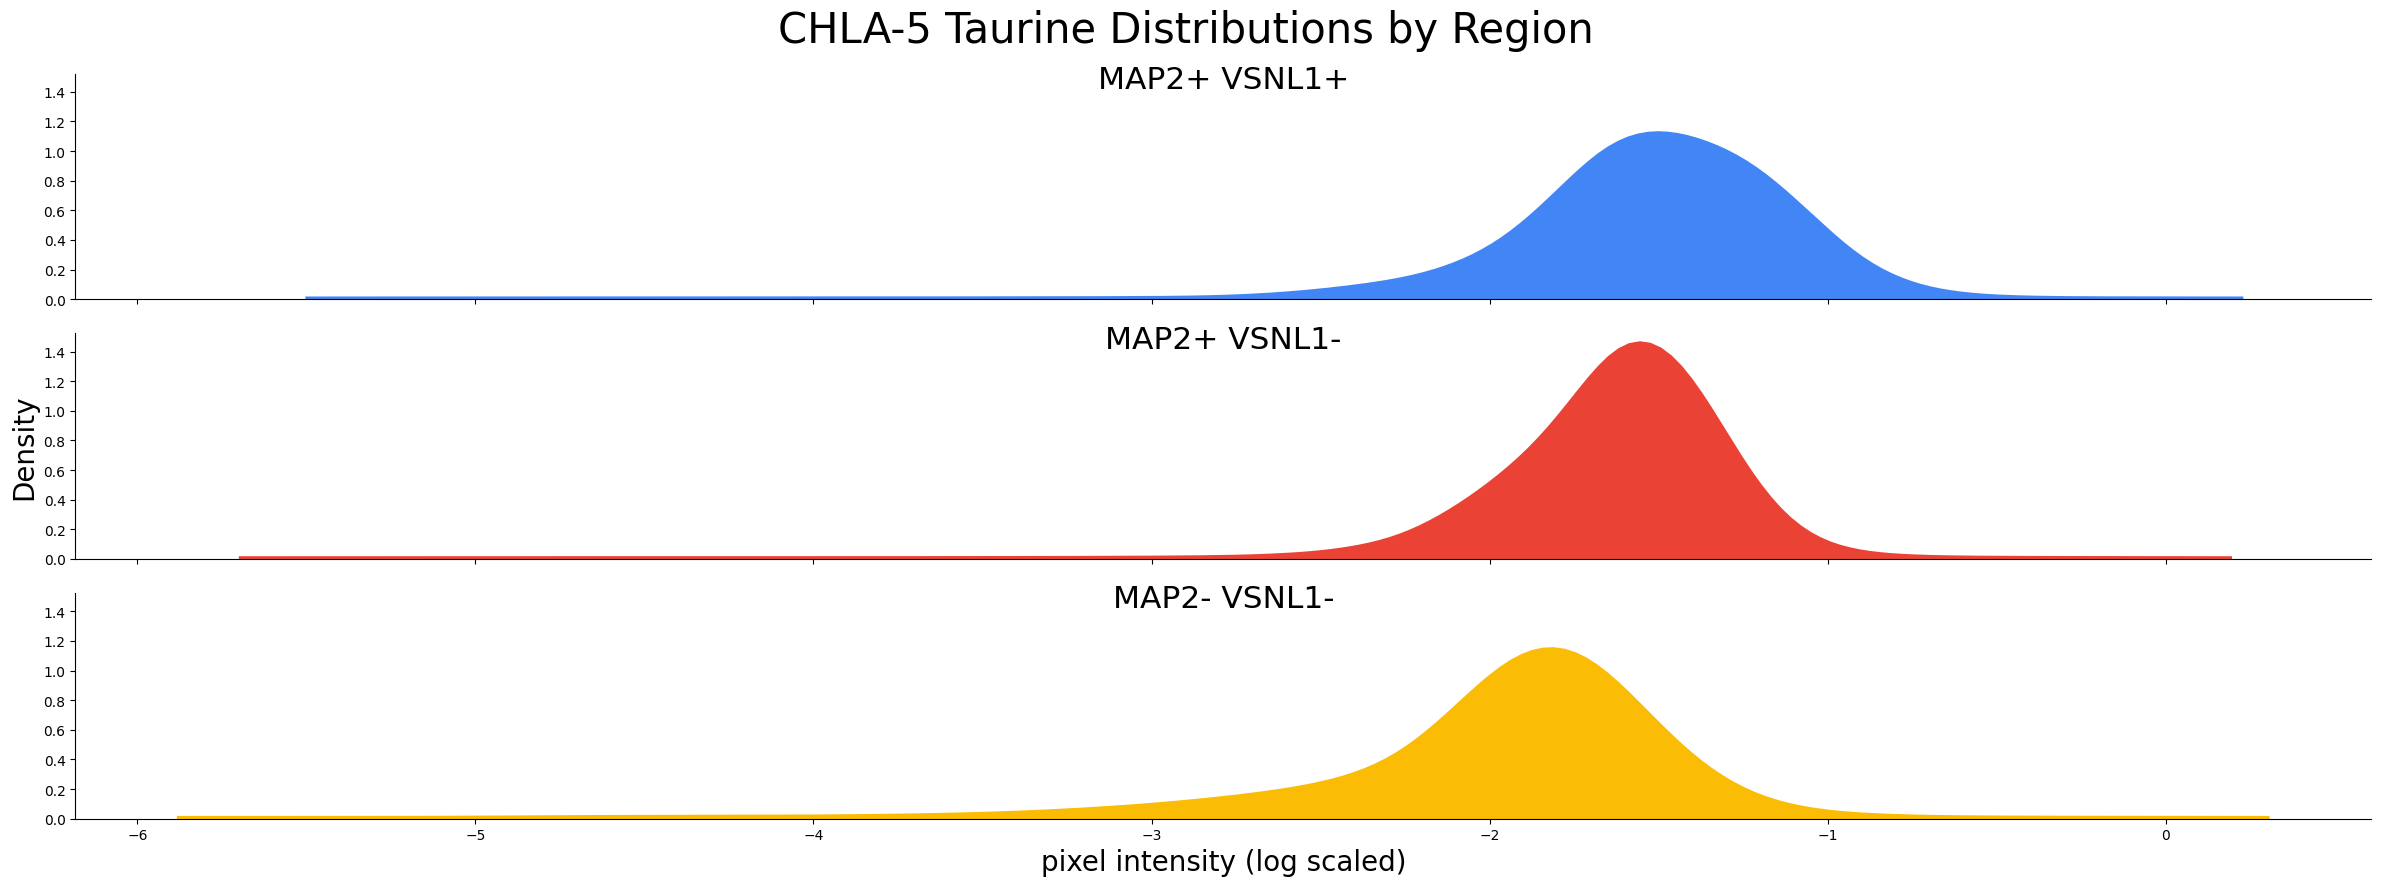

In [10]:
ggg = get_facet_plot(dfs_404[0], dfs_404[2], dfs_404[3], "CHLA-5")

In [11]:
T_tests(dfs_404)

T Tests!
--------

VSNL+/MAP+ vs MAP+/VSNL-
Statistic: 801.86
Pval: 0.0

MAP+/VSNL- vs VSNL-/MAP-
Statistic: 1870.06
Pval: 0.0

VSNL+/MAP+ vs VSNL-/MAP-
Statistic: 2092.56
Pval: 0.0



In [12]:
KS_tests(dfs_404)

KS Tests!
--------

VSNL+/MAP+ vs MAP+/VSNL-
Statistic: 0.18
Pval: 0.0

MAP+/VSNL- vs VSNL-/MAP-
Statistic: 0.36
Pval: 0.0

VSNL+/MAP+ vs VSNL-/MAP-
Statistic: 0.44
Pval: 0.0



# MB767

In [12]:
dataset = '767'
map2, taurine, dapi, vsnl1 = load_dataset(f"mb{dataset}")

In [13]:
# Manual cutoffs
MAP2_CUTOFF_767 = 0.17
VSNL1_CUTOFF_767 = 0.06
VSNL1_ARTIFACT_CUTOFF_767 = 0.25
DAPI_CUTOFF_767 = 0.02

# getting masks for MAP2, VSNL1, and Tissue
map2_mask = get_mask(map2, MAP2_CUTOFF_767, title="Map2", dataset=dataset)
vsnl1_mask = get_mask(vsnl1, VSNL1_CUTOFF_767, title="Vsnl1", dataset=dataset)
vsnl1_artifact_mask = get_mask(vsnl1, VSNL1_ARTIFACT_CUTOFF_767, title="Artifact", dataset=dataset)
tissue_mask = get_tissue_mask(dapi, DAPI_CUTOFF_767, title="tissue",
                              dataset=dataset,
                              min_object_size=2000,)

/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:44: UserWarning: ./mb767/Artifact_obj.tif is a low contrast image
  plt.show()
/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:44: UserWarning: ./mb767/Artifact_hole.tif is a low contrast image
  plt.show()
/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:44: UserWarning: ./mb767/Artifact_closed.tif is a low contrast image
  plt.show()


### artifact removal

In [15]:
vsnl1_mask = np.logical_and(vsnl1_mask, np.logical_not(vsnl1_artifact_mask))

### analysis and region comparison

BOTH


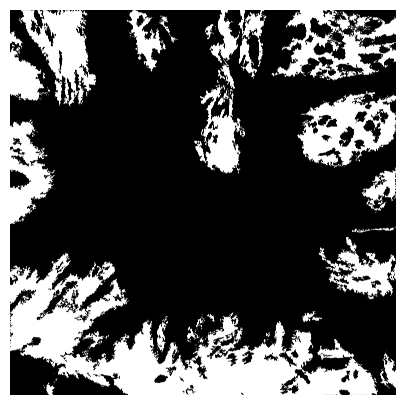

MAP2


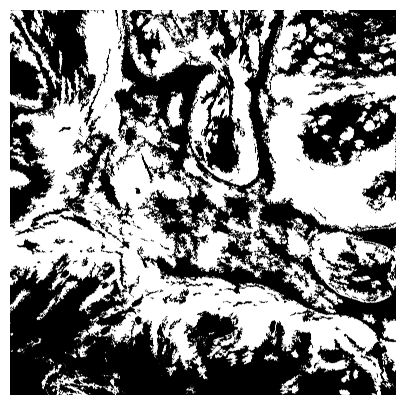

VSNL1


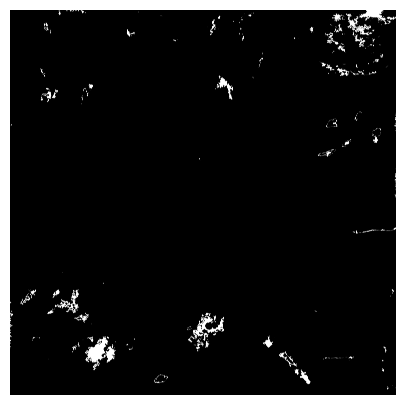

NEITHER


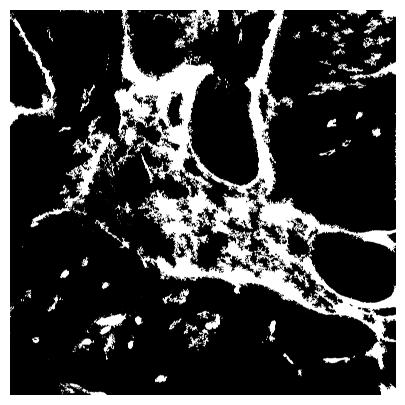

/var/folders/_r/g7gmm8v57w3b2bltn9287fwc0000gn/T/ipykernel_95455/1651203493.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = dfs_767[0].append(dfs_767[1]).append(dfs_767[2]).append(dfs_767[3])
/var/folders/_r/g7gmm8v57w3b2bltn9287fwc0000gn/T/ipykernel_95455/1651203493.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = dfs_767[0].append(dfs_767[1]).append(dfs_767[2]).append(dfs_767[3])


In [16]:
dfs_767 = get_taurine_by_region(tissue_mask, vsnl1_mask, map2_mask, taurine)
concat_df = dfs_767[0].append(dfs_767[1]).append(dfs_767[2]).append(dfs_767[3])

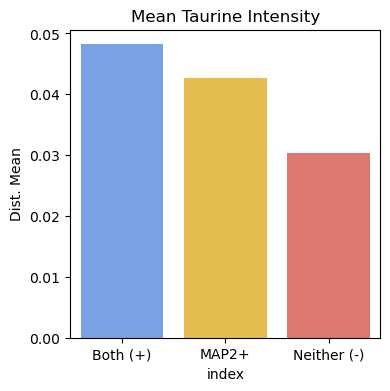

In [17]:
with plt.rc_context({'figure.figsize': (4,4)}):
    get_taurine_bar_plot(dfs_767, dataset)

/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:243: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = both_df.append(map2_df).append(neither_df)


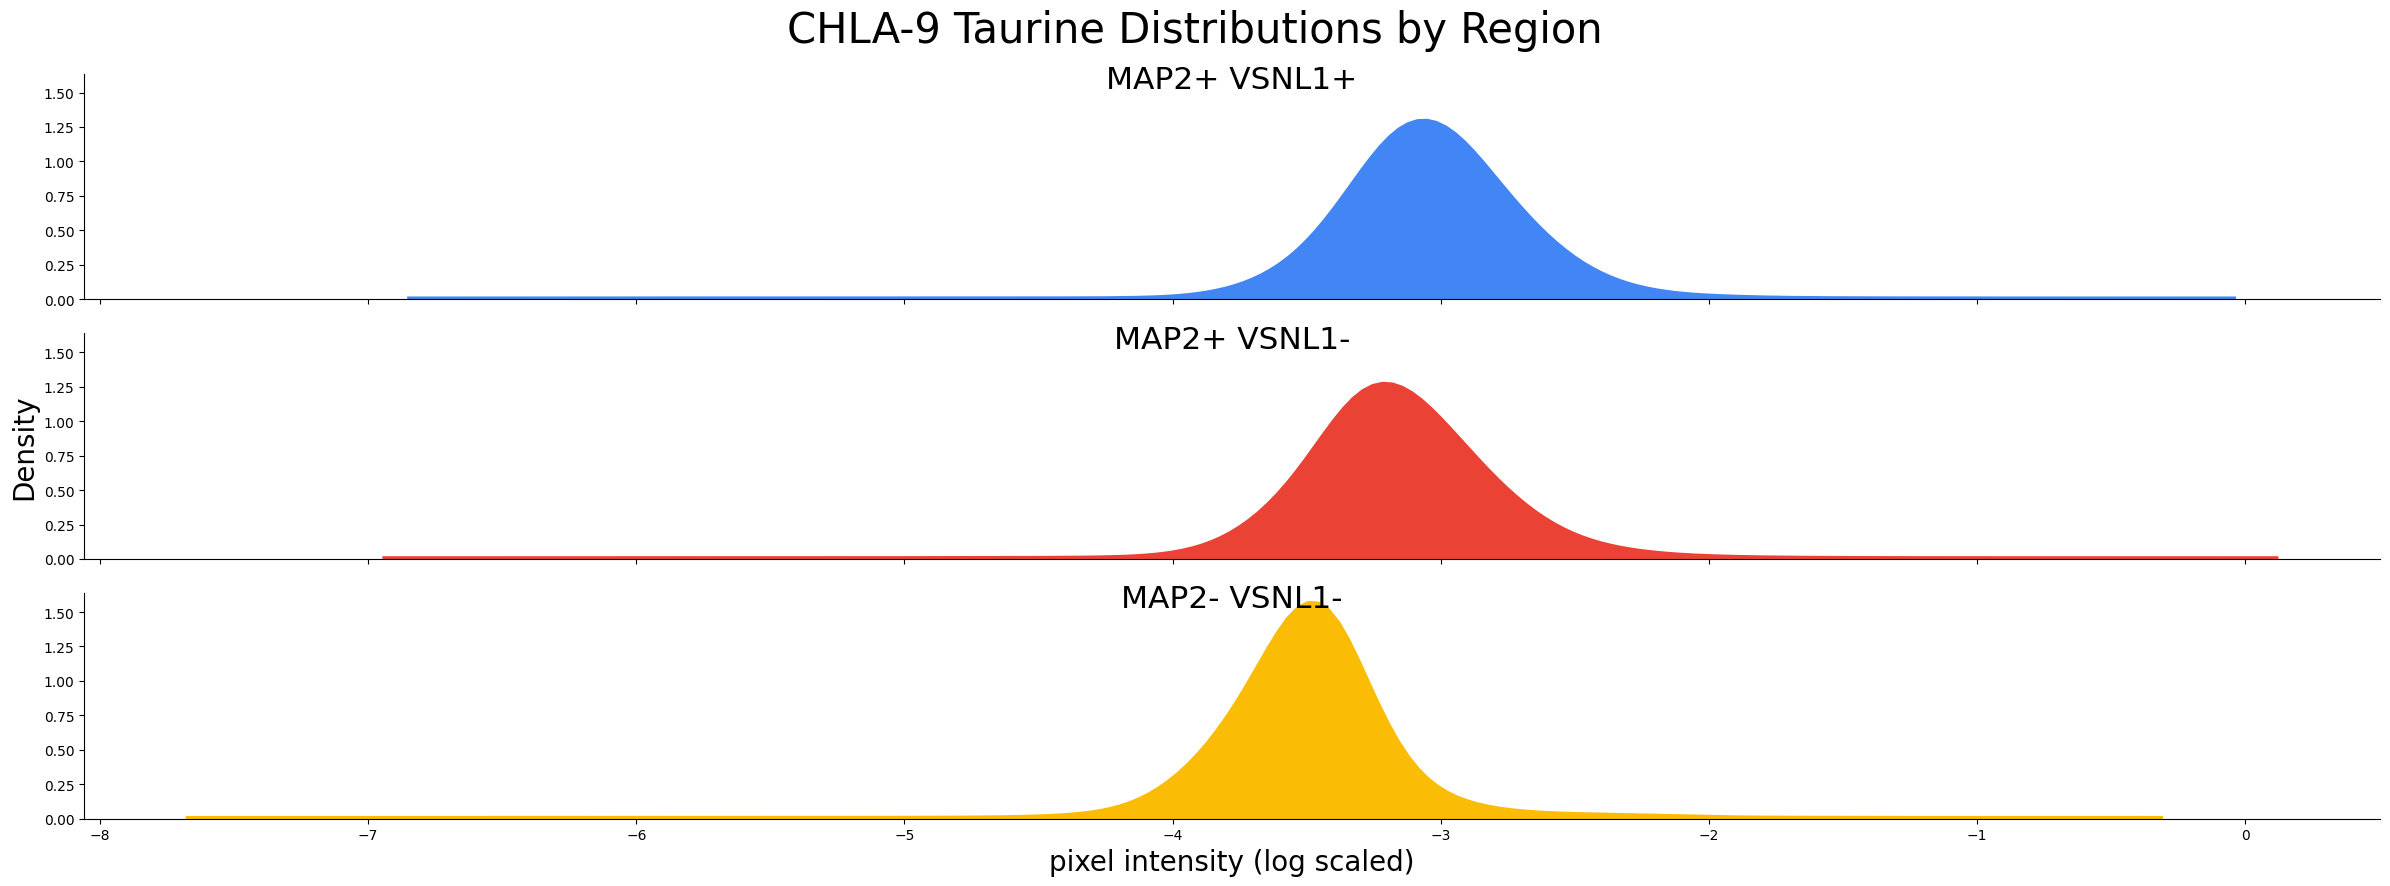

In [18]:
get_facet_plot(dfs_767[0], dfs_767[2], dfs_767[3], "CHLA-9")

In [19]:
KS_tests(dfs_767)

KS Tests!
--------

VSNL+/MAP+ vs MAP+/VSNL-
Statistic: 0.17
Pval: 0.0

MAP+/VSNL- vs VSNL-/MAP-
Statistic: 0.45
Pval: 0.0

VSNL+/MAP+ vs VSNL-/MAP-
Statistic: 0.6
Pval: 0.0



In [20]:
T_tests(dfs_767)

T Tests!
--------

VSNL+/MAP+ vs MAP+/VSNL-
Statistic: 1362.42
Pval: 0.0

MAP+/VSNL- vs VSNL-/MAP-
Statistic: 3004.72
Pval: 0.0

VSNL+/MAP+ vs VSNL-/MAP-
Statistic: 3959.66
Pval: 0.0



# MB901

In [18]:
dataset = '901'
map2, taurine, dapi, vsnl1 = load_dataset(f"mb{dataset}")

In [19]:
MAP2_CUTOFF_901 = 0.151
VSNL1_CUTOFF_901 = 0.06
VSNL1_ARTIFACT_CUTOFF_901 = 0.2
DAPI_CUTOFF_901 = 0.009

map2_mask = get_mask(map2, MAP2_CUTOFF_901, title="Map2", dataset=dataset)
vsnl1_mask = get_mask(vsnl1, VSNL1_CUTOFF_901, title="Vsnl1", dataset=dataset)
vsnl1_artifact_mask = get_mask(vsnl1, VSNL1_ARTIFACT_CUTOFF_901, title="Artifact", dataset=dataset)
tissue_mask = get_tissue_mask(dapi, DAPI_CUTOFF_901, dataset=dataset,title='tissue')

/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:61: UserWarning: ./mb901/Artifact_obj.tif is a low contrast image
  plt.xlabel("Value")
/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:61: UserWarning: ./mb901/Artifact_hole.tif is a low contrast image
  plt.xlabel("Value")
/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:61: UserWarning: ./mb901/Artifact_closed.tif is a low contrast image
  plt.xlabel("Value")


### Artifact Removal

In [20]:
vsnl1_mask = np.logical_and(vsnl1_mask, np.logical_not(vsnl1_artifact_mask))

### analysis and region comparison

BOTH


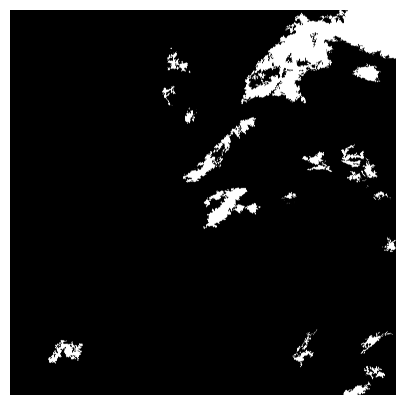

MAP2


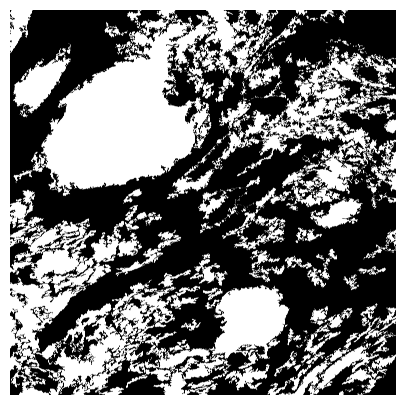

VSNL1


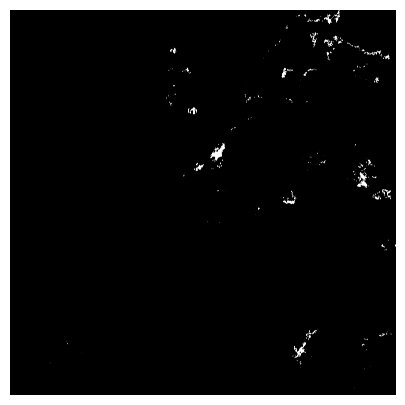

NEITHER


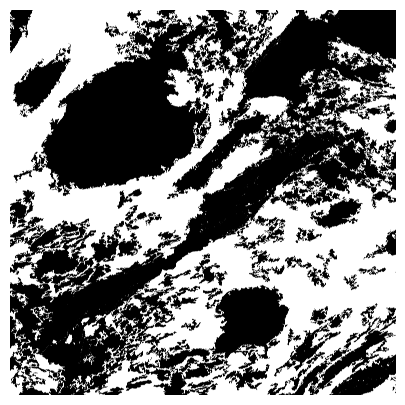

/var/folders/_r/g7gmm8v57w3b2bltn9287fwc0000gn/T/ipykernel_95455/2790209947.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = dfs_901[0].append(dfs_901[1]).append(dfs_901[2]).append(dfs_901[3])
/var/folders/_r/g7gmm8v57w3b2bltn9287fwc0000gn/T/ipykernel_95455/2790209947.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = dfs_901[0].append(dfs_901[1]).append(dfs_901[2]).append(dfs_901[3])


In [21]:
dfs_901 = get_taurine_by_region(tissue_mask, vsnl1_mask, map2_mask, taurine)
concat_df = dfs_901[0].append(dfs_901[1]).append(dfs_901[2]).append(dfs_901[3])

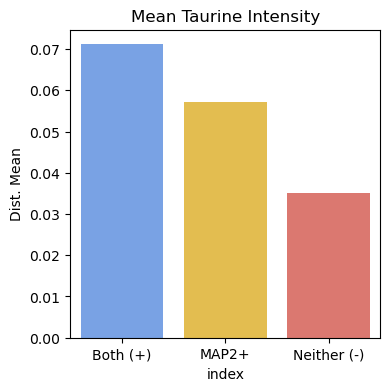

In [22]:
with plt.rc_context({'figure.figsize': (4,4)}):
    get_taurine_bar_plot(dfs_901, dataset)

/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:243: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = both_df.append(map2_df).append(neither_df)


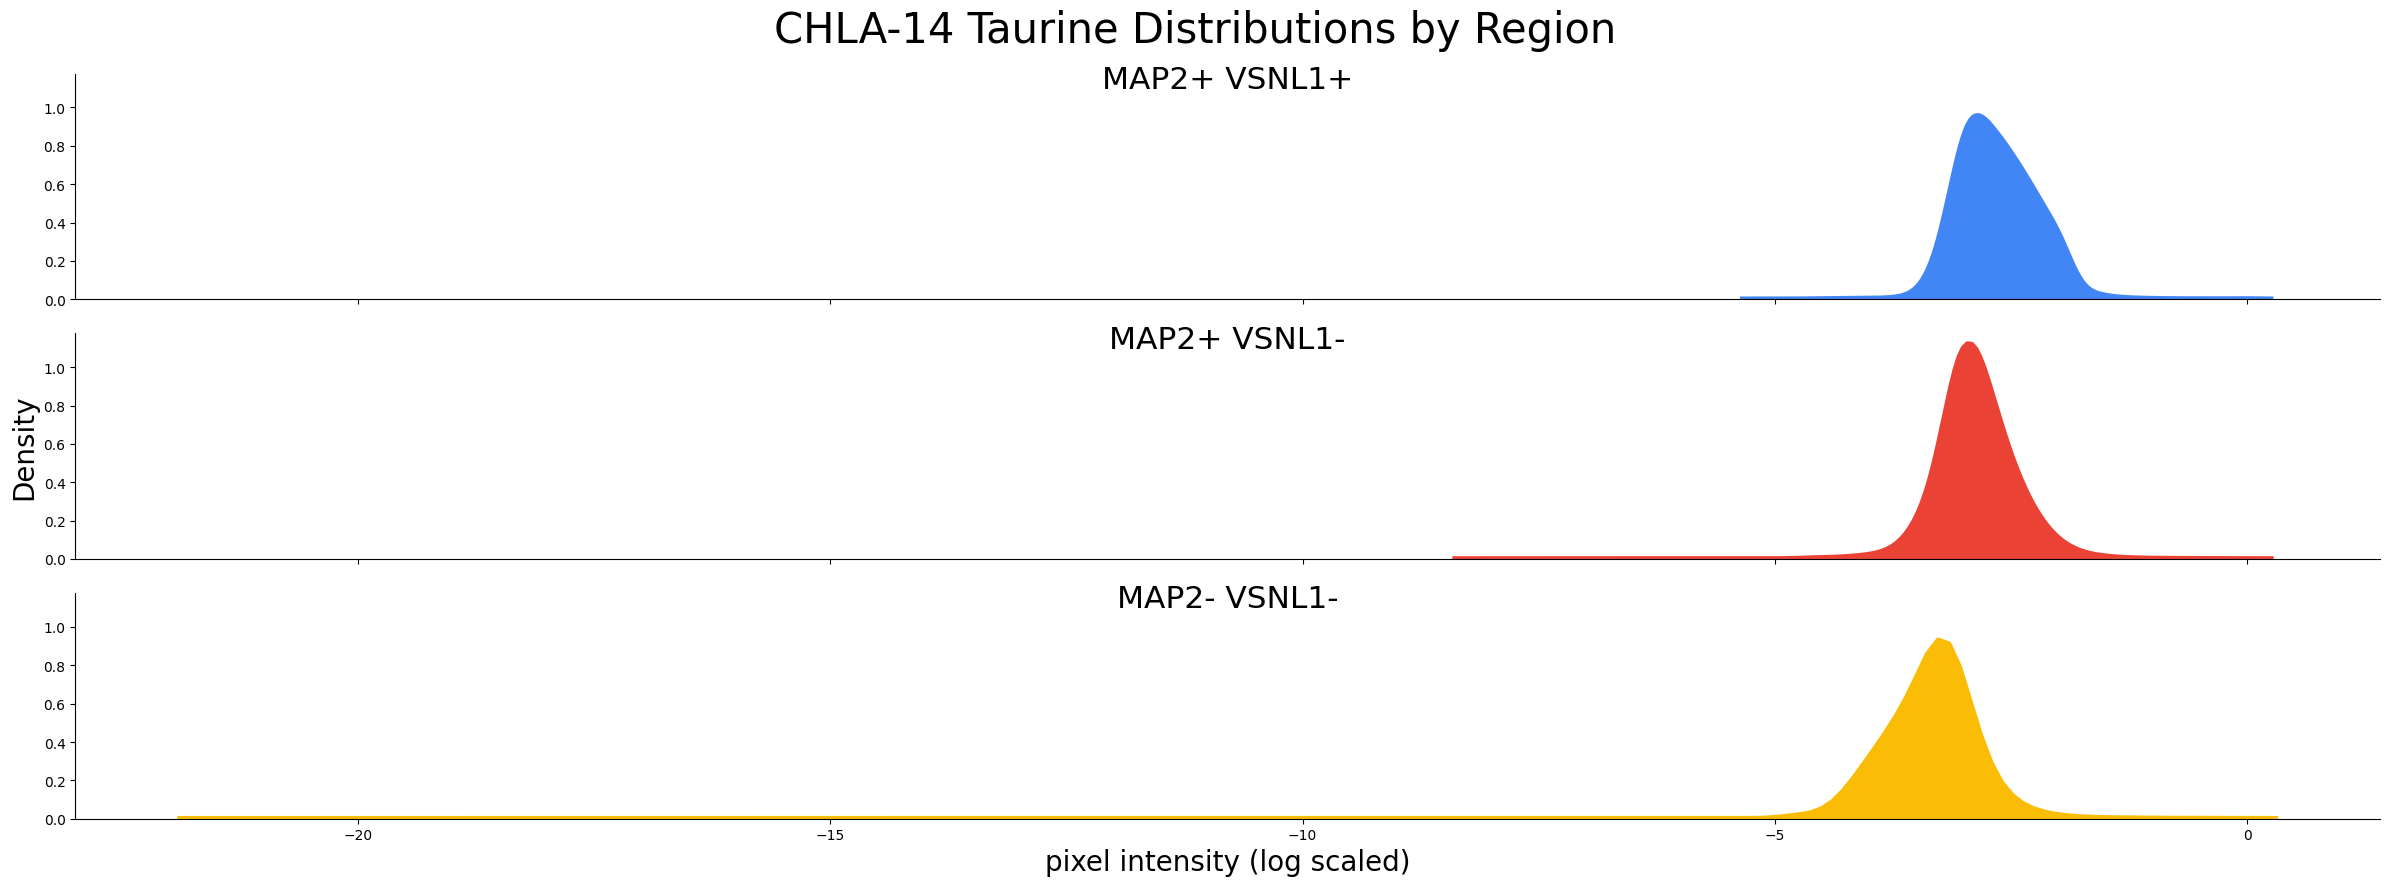

In [8]:
ggg2 = get_facet_plot(dfs_901[0], dfs_901[2], dfs_901[3], "CHLA-14")

In [23]:
KS_tests(dfs_901)

KS Tests!
--------

VSNL+/MAP+ vs MAP+/VSNL-
Statistic: 0.21
Pval: 0.0

MAP+/VSNL- vs VSNL-/MAP-
Statistic: 0.45
Pval: 0.0

VSNL+/MAP+ vs VSNL-/MAP-
Statistic: 0.6
Pval: 0.0



In [24]:
T_tests(dfs_901)

T Tests!
--------

VSNL+/MAP+ vs MAP+/VSNL-
Statistic: 1030.03
Pval: 0.0

MAP+/VSNL- vs VSNL-/MAP-
Statistic: 3546.27
Pval: 0.0

VSNL+/MAP+ vs VSNL-/MAP-
Statistic: 3231.33
Pval: 0.0



# MB902

In [9]:
dataset = '902'
map2, taurine, dapi, vsnl1 = load_dataset(f"mb{dataset}")

In [10]:
MAP2_CUTOFF_902 = 0.1
VSNL1_CUTOFF_902 = 0.08
VSNL1_ARTIFACT_CUTOFF_902 = 0.35
DAPI_CUTOFF_902 = 0.02

map2_mask = get_mask(map2, MAP2_CUTOFF_902, title="Map2", dataset=dataset)
vsnl1_mask = get_mask(vsnl1, VSNL1_CUTOFF_902, title="Vsnl1", dataset=dataset)
vsnl1_artifact_mask = get_mask(vsnl1, VSNL1_ARTIFACT_CUTOFF_902, title="Artifact", dataset=dataset)

/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:32: UserWarning: ./mb902/Artifact_obj.tif is a low contrast image
  io.imsave(name, image.astype('uint8') * 255)
/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:32: UserWarning: ./mb902/Artifact_hole.tif is a low contrast image
  io.imsave(name, image.astype('uint8') * 255)
/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:32: UserWarning: ./mb902/Artifact_closed.tif is a low contrast image
  io.imsave(name, image.astype('uint8') * 255)


### Remove upper right tissue/get a tissue mask

Upper right segment of tissue has clear autofluorescence (based on visual inspection and DAPI channel), so this area was removed

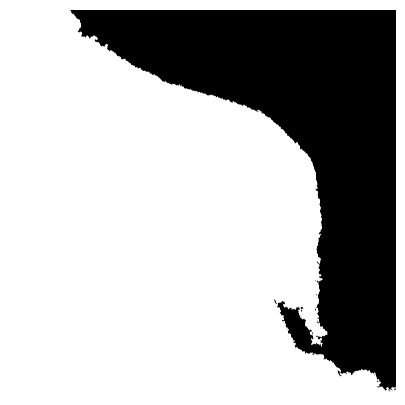

In [11]:
tissue_mask = get_tissue_mask(dapi, DAPI_CUTOFF_902, 
                              dataset=dataset,
                              title='tissue',
                              structuring_element_size = 10,
                              min_hole_size=100000,
                              min_object_size=800000
                             )

left_tissue_mask = morphology.remove_small_objects(tissue_mask, min_size=50000000)
display_image(left_tissue_mask)

In [12]:
all_tissue_mask = get_tissue_mask(dapi, 0.02, 
                              dataset=dataset,
                              title='tissue_2',
                             )
final_tissue_mask = np.logical_and(all_tissue_mask, left_tissue_mask)

### vsnl1 artifact removal

In [13]:
vsnl1_mask = np.logical_and(vsnl1_mask, np.logical_not(vsnl1_artifact_mask))

### analysis by region

BOTH


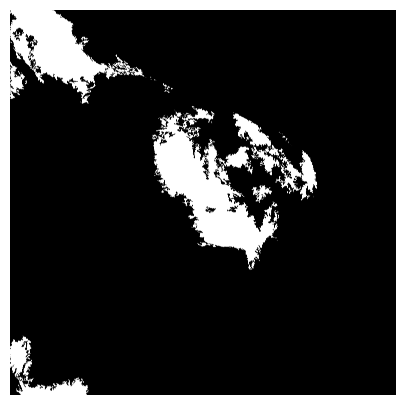

MAP2


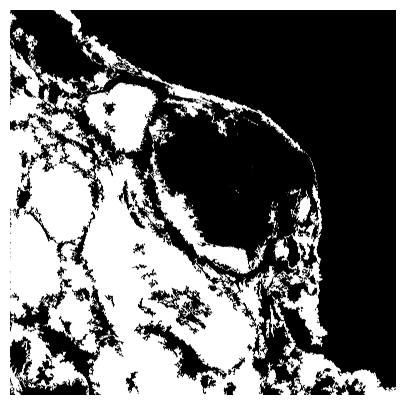

VSNL1


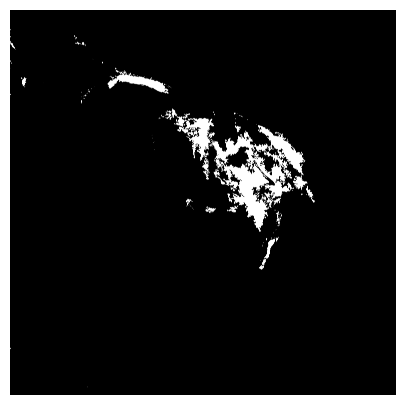

NEITHER


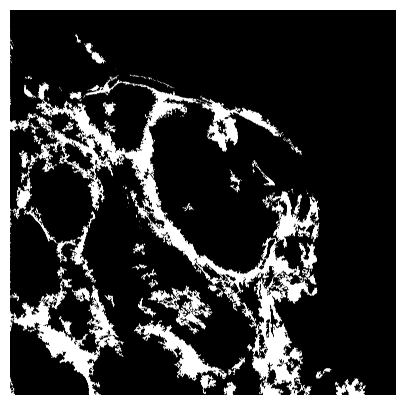

/var/folders/_r/g7gmm8v57w3b2bltn9287fwc0000gn/T/ipykernel_86098/117863552.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = dfs_902[0].append(dfs_902[1]).append(dfs_902[2]).append(dfs_902[3])
/var/folders/_r/g7gmm8v57w3b2bltn9287fwc0000gn/T/ipykernel_86098/117863552.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = dfs_902[0].append(dfs_902[1]).append(dfs_902[2]).append(dfs_902[3])


In [14]:
dfs_902 = get_taurine_by_region(final_tissue_mask, vsnl1_mask, map2_mask, taurine)
concat_df = dfs_902[0].append(dfs_902[1]).append(dfs_902[2]).append(dfs_902[3])

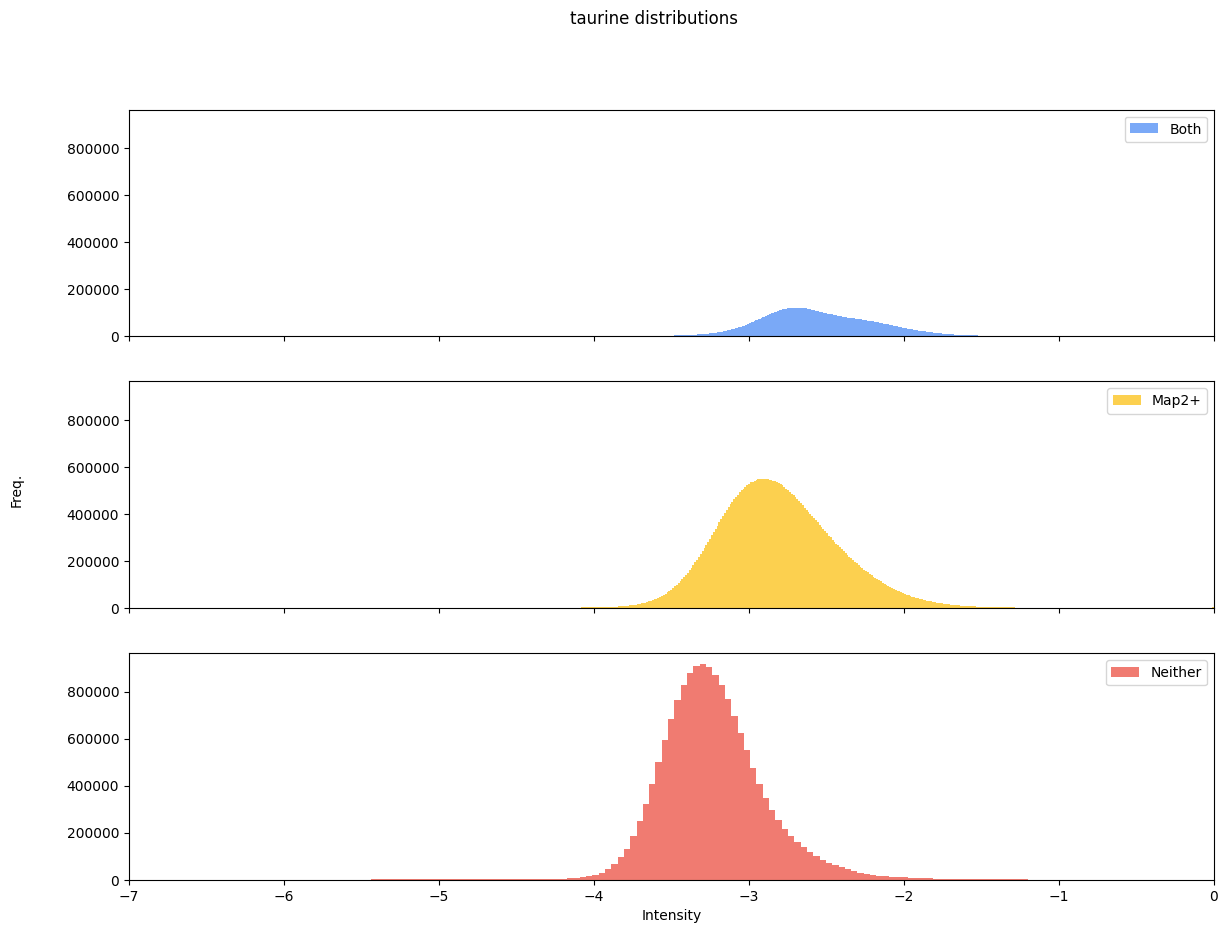

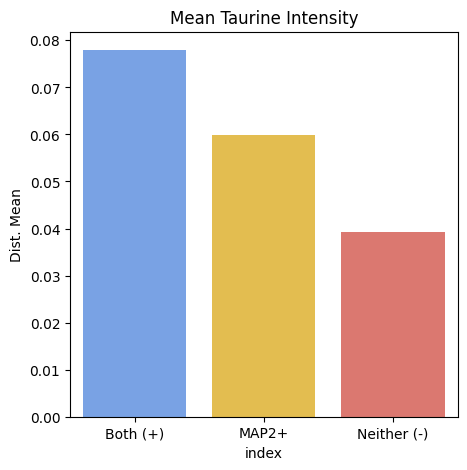

In [15]:
get_taurine_dist_plot(dfs_902, dataset)
get_taurine_bar_plot(dfs_902, dataset)

/Users/veronikapister/Documents/medullo/cycif_revisions/final analysis/gold_nature_comm.py:243: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = both_df.append(map2_df).append(neither_df)


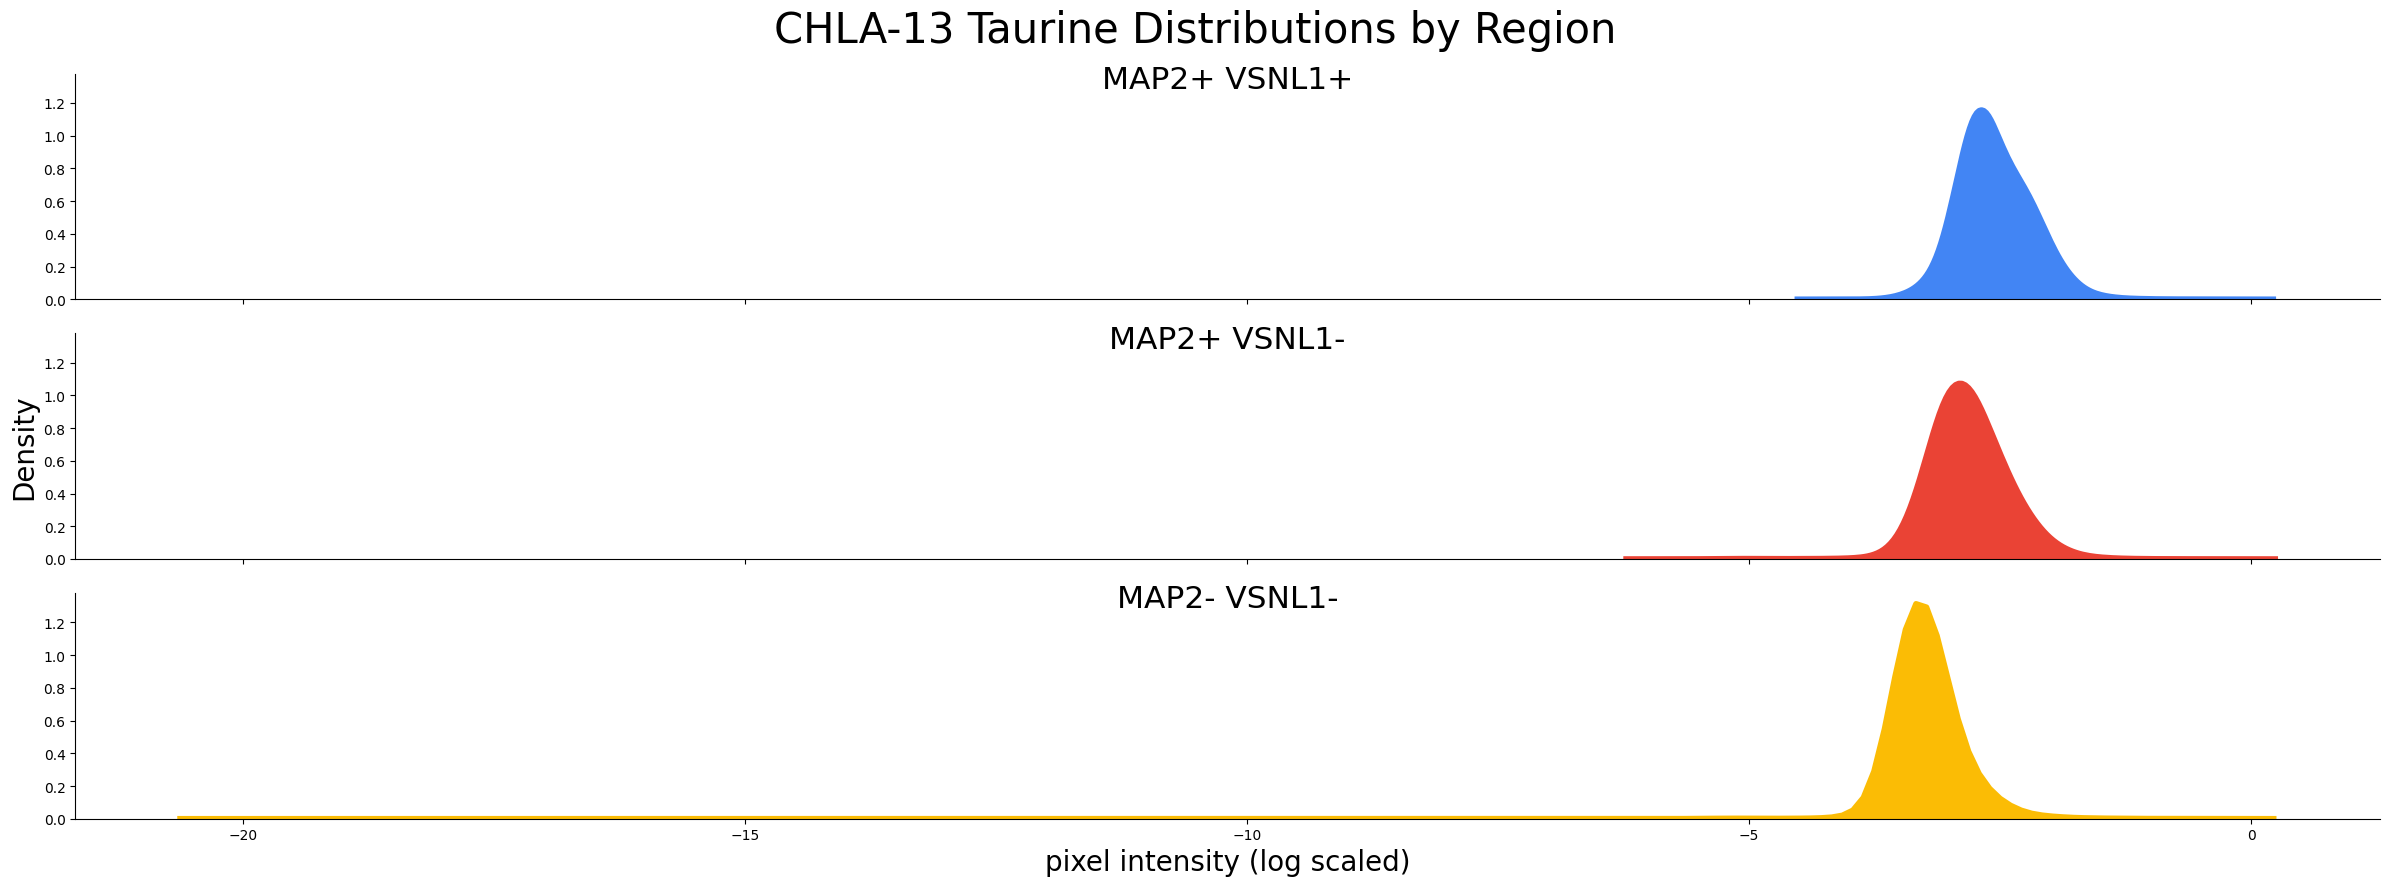

In [16]:
ggg2 = get_facet_plot(dfs_902[0], dfs_902[2], dfs_902[3], "CHLA-13")

In [ ]:
species = ("mb404", "mb767", "mb901", "mb902")

region_means = {
    'Both (+)': [],
    'MAP2+': [],
    'Neither (-)': [],
}

for dfs in (dfs_404, dfs_767, dfs_901, dfs_902):
    dfs = [df.dropna() for df in dfs]
    both_df, _, map2_df, neither_df = dfs
    
    region_means["Both (+)"].append( round(np.exp(both_df.x).mean() ,3))
    region_means["Neither (-)"].append( round(np.exp(neither_df.x).mean() ,3))
    region_means["MAP2+"].append( round(np.exp(map2_df.x).mean() ,3))
            
region_means

In [ ]:
region_errs = {
    'Both (+)': [],
    'MAP2+': [],
    'Neither (-)': [],
}

for dfs in (dfs_404, dfs_767, dfs_901, dfs_902):
    dfs = [df.dropna() for df in dfs]
    both_df, _, map2_df, neither_df = dfs
    
    region_errs["Both (+)"].append( np.std(np.exp(both_df.x), ddof=1) / np.sqrt(np.size(both_df.x)) )
    region_errs["Neither (-)"].append( np.std(np.exp(neither_df.x), ddof=1) / np.sqrt(np.size(neither_df.x)) )
    region_errs["MAP2+"].append( np.std(np.exp(map2_df.x), ddof=1) / np.sqrt(np.size(map2_df.x)) )
            
region_errs

In [ ]:
x = np.arange(len(species))  # the label locations
width = 0.26  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(8, 5))

for attribute, measurement in region_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, 
                   #yerr=region_errs[attribute],ecolor='black', capsize=10
                  )
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Distribution Means')
ax.set_title('Taurine distribution by region')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 0.26)

plt.show()